In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('anime.csv')

In [4]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [11]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [10]:
df["rating"]=df["rating"].fillna(df["rating"].mean())
df["genre"]=df["genre"].fillna(df["genre"].mode()[0])
df["type"]=df["type"].fillna(df["type"].mode()[0])

In [12]:
#cheking null values.

In [13]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [16]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

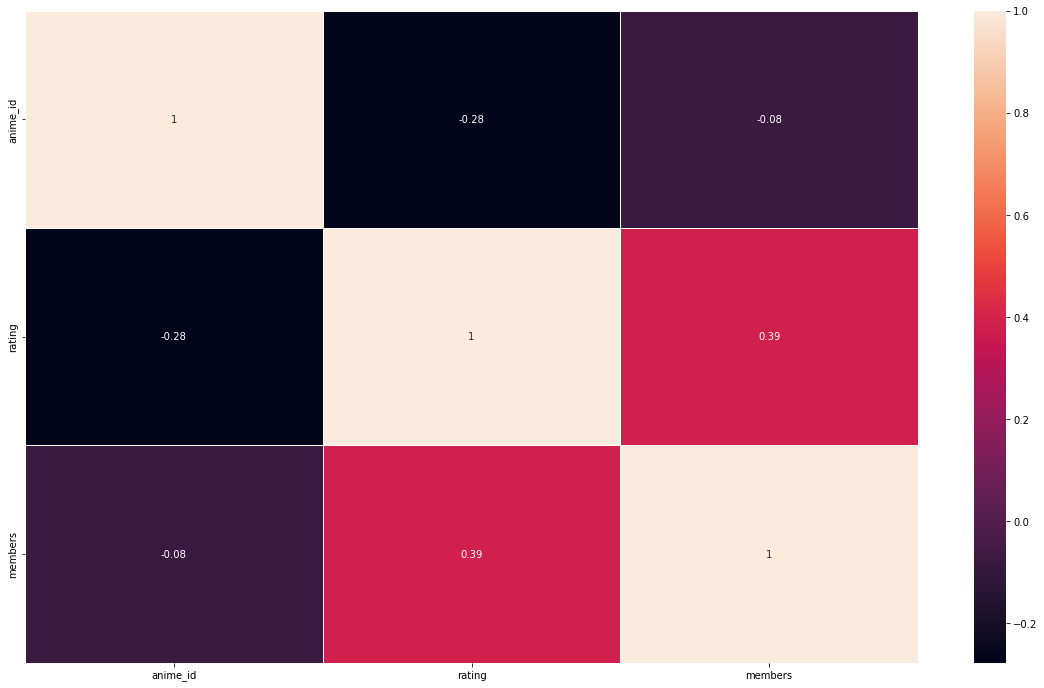

In [18]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [19]:
columns_to_keep = ['rating', 'genre']
x=df[columns_to_keep].copy()
x

,rating,genre
0,9.37,"Drama, Romance, School, Supernatural"
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9.17,"Sci-Fi, Thriller"
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...
12289,4.15,Hentai
12290,4.28,Hentai
12291,4.88,Hentai
12292,4.98,Hentai


In [20]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x['genre']=le1.fit_transform(x['genre'])

In [21]:
#elbow
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,7):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(x)
  wcss.append(km.inertia_)

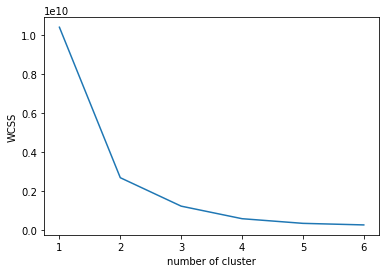

In [22]:
plt.plot(range(1,7),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [23]:
km1=KMeans(n_clusters=3,init='k-means++',random_state=5)
y_kmeans=km1.fit_predict(x)
y_kmeans

array([2, 0, 0, ..., 2, 2, 2])

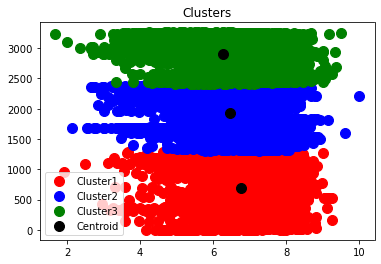

In [24]:
X=np.array(x)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s = 100,c = 'green', label = 'Cluster3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.legend()
plt.show()

In [25]:
#REVERSE LABEL ENCODING TO GET MEANINGFUL INFERENCE FROM THE CLUSTERS

X=pd.DataFrame(x,columns=('rating', 'genre'))
y=np.array(y_kmeans)
X['cluster']=y
X['genre']=le1.inverse_transform(X['genre'])

In [26]:
X

,rating,genre,cluster
0,9.37,"Drama, Romance, School, Supernatural",2
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili...",0
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S...",0
3,9.17,"Sci-Fi, Thriller",2
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S...",0
...,...,...,...
12289,4.15,Hentai,2
12290,4.28,Hentai,2
12291,4.88,Hentai,2
12292,4.98,Hentai,2


In [27]:
a=X.loc[X['cluster']==0][['rating', 'genre']]
a

,rating,genre
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S..."
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S..."
6,9.13,"Action, Adventure, Shounen, Super Power"
8,9.10,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...
12221,5.11,"Action, Comedy, Demons, Hentai, Martial Arts, ..."
12225,5.08,"Action, Comedy, Hentai, Romance, Supernatural"
12242,4.69,"Action, Hentai, Sci-Fi"
12244,4.60,"Action, Hentai"


In [28]:
b=X.loc[X['cluster']==1][['rating', 'genre']]
b

,rating,genre
5,9.15,"Comedy, Drama, School, Shounen, Sports"
14,8.93,"Comedy, Drama, School, Shounen, Sports"
15,8.93,"Adventure, Drama, Supernatural"
17,8.88,"Adventure, Fantasy, Historical, Mystery, Seine..."
20,8.83,"Comedy, Drama, Shounen, Sports"
...,...,...
12263,3.11,"Comedy, Hentai"
12268,2.86,"Comedy, Hentai, Historical"
12272,4.14,"Comedy, Hentai, Parody"
12273,4.00,"Comedy, Hentai, Parody"


In [29]:
c=X.loc[X['cluster']==2][['rating', 'genre']]
c

,rating,genre
0,9.37,"Drama, Romance, School, Supernatural"
3,9.17,"Sci-Fi, Thriller"
7,9.11,"Drama, Military, Sci-Fi, Space"
10,9.06,"Drama, Fantasy, Romance, Slice of Life, Supern..."
11,9.05,"Drama, School, Shounen"
...,...,...
12289,4.15,Hentai
12290,4.28,Hentai
12291,4.88,Hentai
12292,4.98,Hentai


RESULT:

in CLUSTER 0 the hight rating is in Action, Adventure, Drama, Fantasy, Magic

in CLUSTER 1 the hight rating is in Comedy, Drama, School, Shounen, Sports

in CLUSTER 2 the hight rating is in Drama, Romance, School, Supernatural